In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! kaggle datasets download iarunava/cell-images-for-detecting-malaria


 97% 658M/675M [00:05<00:00, 91.8MB/s]
100% 675M/675M [00:05<00:00, 135MB/s] 


In [3]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Import libraries

In [4]:
import numpy as np
import pandas as pd
import glob
import os
import tensorflow as tf

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

import os


Datasets import

In [5]:
!unzip /content/cell-images-for-detecting-malaria.zip


Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

In [6]:
import os
os.getcwd()

'/content'

In [7]:
# creating dataframe from image with path to image in one column and label in another column

par_img_path = []
uninf_img_path = []

# /content/cell_images/Parasitized
# /content/cell-images-for-detecting-malaria.zip

# for all images in parasitized folder
for image_path in os.listdir('./cell_images/Parasitized/'): 
     par_img_path.append('./cell_images/Parasitized/' + image_path)
        
# for all images in uninfected folder
for image_path in os.listdir('./cell_images/Uninfected/'):
    uninf_img_path.append('./cell_images/Uninfected/' + image_path)
# print(len(par_img_path))
# print(len(uninf_img_path))

    
cell_type_par = len(par_img_path) * ['parasitized']
cell_type_uninf = len(uninf_img_path) * ['uninfected']

# print(cell_type_par)

# creating a dataframe with column containing parasitized images path and another column with label form cell_type_par
df_par = pd.DataFrame({'image_path': par_img_path, 'cell_type': cell_type_par})

# creating a dataframe with column containing uninfected images path and another column with label form cell_type_uninf
df_uninf = pd.DataFrame({'image_path': uninf_img_path, 'cell_type': cell_type_uninf})

# creating a compound dataframe from above two dataframe
df = pd.concat([df_par, df_uninf])

# df
# reset index to start from 0 to length of dataframe 
df = df.reset_index(drop=True)

df

image_path    cell_type
0      ./cell_images/Parasitized/C164P125ThinF_IMG_20...  parasitized
1      ./cell_images/Parasitized/C97P58ThinF_IMG_2015...  parasitized
2      ./cell_images/Parasitized/C130P91ThinF_IMG_201...  parasitized
3      ./cell_images/Parasitized/C132P93ThinF_IMG_201...  parasitized
4      ./cell_images/Parasitized/C46P7ThinF_IMG_20151...  parasitized
...                                                  ...          ...
27555  ./cell_images/Uninfected/C239ThinF_IMG_2015112...   uninfected
27556  ./cell_images/Uninfected/C84P45ThinF_IMG_20150...   uninfected
27557  ./cell_images/Uninfected/C98P59ThinF_IMG_20150...   uninfected
27558  ./cell_images/Uninfected/C166P127ThinF_IMG_201...   uninfected
27559  ./cell_images/Uninfected/C124P85ThinF_IMG_2015...   uninfected

[27560 rows x 2 columns]

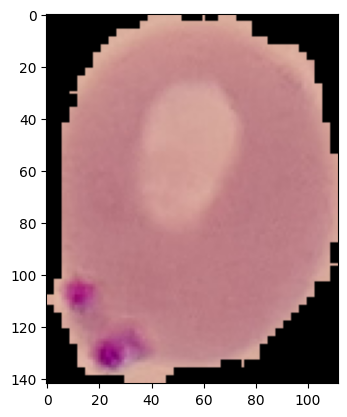

In [8]:
plt.imshow(imread(df['image_path'][3]))

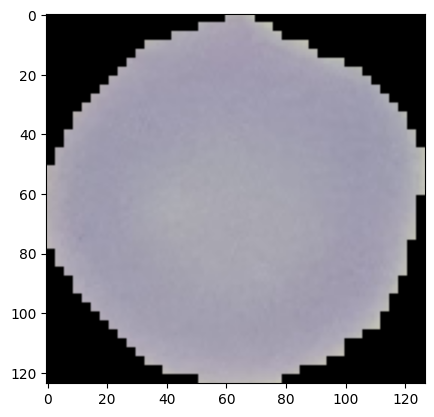

In [9]:
plt.imshow(imread(df['image_path'].iloc[-2]))

In [10]:
# creating test-train split

from sklearn.model_selection import train_test_split

train_par, test_par = train_test_split(df[df['cell_type'] == 'parasitized'], test_size = 0.15)
train_uninf, test_uninf = train_test_split(df[df['cell_type'] == 'uninfected'],test_size=0.15)

In [11]:
train_par.shape

(11713, 2)

In [12]:
test_par.shape

(2067, 2)

In [13]:
# creating combined dataframe for test and train

df_train = pd.concat([train_par, train_uninf])
df_test = pd.concat([test_par, test_uninf])

In [14]:
print(df_train.shape)
print(df_test.shape)

(23426, 2)
(4134, 2)


In [15]:
# to check whether the images are of same size

d1= []
d2 = []

for image_filename in df_test['image_path']:
    if image_filename[-3:] == 'png':
        img = imread(image_filename)
        height,width,colors = img.shape
        
        d1.append(height)
        d2.append(width)

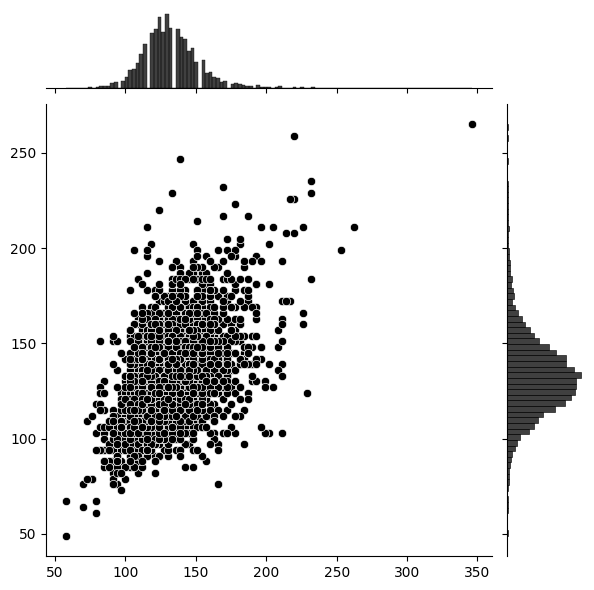

In [16]:
# distribution of images in test_df

sns.jointplot(x=d1, y=d2, color='#000000')

In [17]:
print(np.mean(d1))
print(np.mean(d2))

132.4419448476052
132.4579100145138


In [18]:
image_shape = (132,132,3)

MODEL BUILDING

In [19]:
from keras.layers import Dense, Flatten
from keras.models import Model, Sequential

from sklearn.metrics import classification_report, confusion_matrix
from keras.applications.resnet import ResNet50
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg19 import VGG19

from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator



VGG19


In [20]:
vgg = VGG19(input_shape=image_shape, weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [21]:
for layer in vgg.layers:
    layer.trainable = False

In [22]:
x = vgg.output
x = GlobalAveragePooling2D()(x) 
x = Dense(1024, activation='relu')(x) 

# a dense laye with 1 neuron as the output because our dataset is binary, i.e., an image can either be parasitized or uninfected
# use activation as sigmoid for binary classification datasets
predictions = Dense(1, activation='sigmoid')(x)

# Specify inputs and outputs to create final model
vgg_model = Model(inputs=vgg.input, outputs=predictions) 

vgg_model.compile(loss='binary_crossentropy', # use binary_crossentropy as our data is binary
              optimizer='adam', # other optimizers can be tried
              metrics=['accuracy'])

In [23]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255)

In [24]:
# generate batches for training 
training_set =  train_datagen.flow_from_dataframe(dataframe = df_train, 
                                                  x_col='image_path', # column in `dataframe` that contains the filenames
                                                  y_col='cell_type', # column in `dataframe` that has the target data
                                                  class_mode='binary', # because oyr dataset is binary
                                                  target_size=(132,132), # target image size (length, width)
                                                  batch_size=32); # add batch size

# generate batches for testing 
test_set = test_datagen.flow_from_dataframe(dataframe = df_test, 
                                            x_col='image_path', 
                                            y_col='cell_type', 
                                            class_mode='binary', 
                                            target_size=(132,132), 
                                            shuffle=False, 
                                            batch_size=32);

Found 23424 validated image filenames belonging to 2 classes.
Found 4134 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [26]:
results = vgg_model.fit(training_set,
                    epochs=20,
                    validation_data=test_set, # on which data should the model validate on
                    callbacks=[early_stop])

Epoch 1/20
732/732 [==============================] - 146s 184ms/step - loss: 0.3083 - accuracy: 0.8720 - val_loss: 0.2393 - val_accuracy: 0.9107
Epoch 2/20
732/732 [==============================] - 138s 188ms/step - loss: 0.2424 - accuracy: 0.9063 - val_loss: 0.2963 - val_accuracy: 0.8800
Epoch 3/20
732/732 [==============================] - 130s 178ms/step - loss: 0.2315 - accuracy: 0.9116 - val_loss: 0.2349 - val_accuracy: 0.9057
Epoch 4/20
732/732 [==============================] - 132s 180ms/step - loss: 0.2155 - accuracy: 0.9160 - val_loss: 0.2662 - val_accuracy: 0.8948
Epoch 5/20
732/732 [==============================] - 130s 178ms/step - loss: 0.2132 - accuracy: 0.9169 - val_loss: 0.3287 - val_accuracy: 0.8737


In [27]:
losses = pd.DataFrame(vgg_model.history.history) 

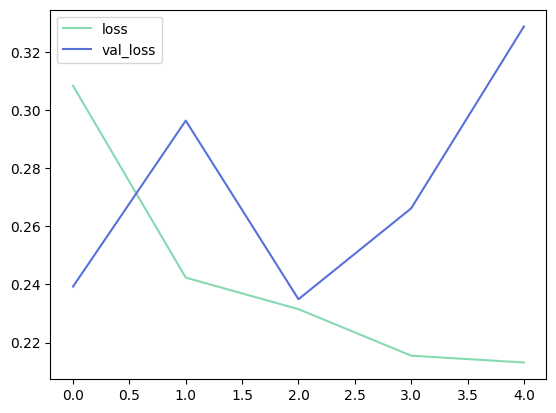

In [28]:
losses[['loss','val_loss']].plot(color=['#88D9B1', '#5770DB']);


In [29]:
pred_probabilities = vgg_model.predict(test_set) # returns probabilities of an image being parasitized or uninfected
predictions = pred_probabilities > 0.5 # boolean predictions on test data, whether the model thinks an image is parasitized or uninfected

130/130 [==============================] - 8s 60ms/step


              precision    recall  f1-score   support

           0       0.98      0.77      0.86      2067
           1       0.81      0.98      0.89      2067

    accuracy                           0.87      4134
   macro avg       0.89      0.87      0.87      4134
weighted avg       0.89      0.87      0.87      4134



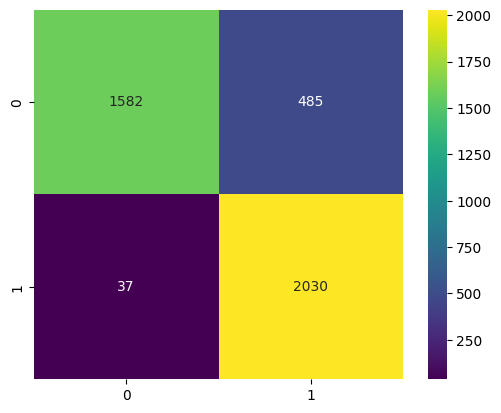

In [30]:
print(classification_report(test_set.classes,predictions))


from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(df_test['cell_type'].map({'parasitized': 0, 'uninfected': 1}),predictions)
f = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', square=True)

In [31]:
vgg_model_accuracy = losses['val_accuracy'].iloc[-1].round(2) * 100
vgg_model_accuracy

87.0

In [32]:
vgg_model.save('vgg_malaria.h5')


INCEPTION RESNET

In [33]:
inception_resnet = InceptionResNetV2(input_shape=image_shape, weights='imagenet', include_top=False)


219055592/219055592 [==============================] - 1s 0us/step


In [34]:
for layer in inception_resnet.layers:
  layer.trainable = False

In [35]:
x = inception_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

inception_resnet_model = Model(inputs=inception_resnet.input, outputs=predictions)

inception_resnet_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [37]:
results = inception_resnet_model.fit(training_set,epochs=20,
                              validation_data=test_set,
                              callbacks=[early_stop])

Epoch 1/20
732/732 [==============================] - 154s 191ms/step - loss: 0.3317 - accuracy: 0.8766 - val_loss: 0.2472 - val_accuracy: 0.9003
Epoch 2/20
732/732 [==============================] - 136s 185ms/step - loss: 0.2652 - accuracy: 0.8965 - val_loss: 0.2192 - val_accuracy: 0.9144
Epoch 3/20
732/732 [==============================] - 134s 184ms/step - loss: 0.2532 - accuracy: 0.9017 - val_loss: 0.2198 - val_accuracy: 0.9110
Epoch 4/20
732/732 [==============================] - 135s 184ms/step - loss: 0.2426 - accuracy: 0.9044 - val_loss: 0.2125 - val_accuracy: 0.9139
Epoch 5/20
732/732 [==============================] - 136s 185ms/step - loss: 0.2385 - accuracy: 0.9050 - val_loss: 0.2131 - val_accuracy: 0.9149
Epoch 6/20
732/732 [==============================] - 135s 184ms/step - loss: 0.2290 - accuracy: 0.9093 - val_loss: 0.1918 - val_accuracy: 0.9253
Epoch 7/20
732/732 [==============================] - 135s 184ms/step - loss: 0.2311 - accuracy: 0.9095 - val_loss: 0.1903 -

In [38]:
losses = pd.DataFrame(inception_resnet_model.history.history)

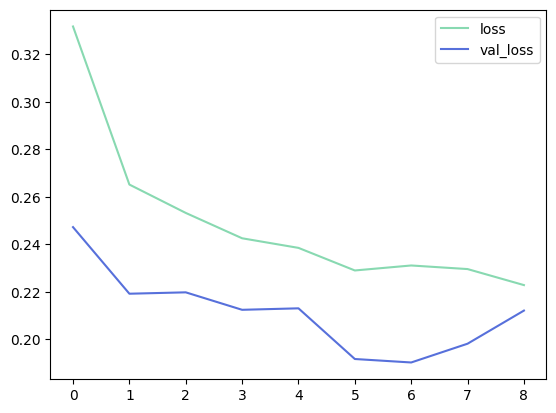

In [39]:
losses[['loss','val_loss']].plot(color=['#88D9B1', '#5770DB']);

130/130 [==============================] - 11s 58ms/step
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2067
           1       0.88      0.97      0.92      2067

    accuracy                           0.92      4134
   macro avg       0.92      0.92      0.92      4134
weighted avg       0.92      0.92      0.92      4134



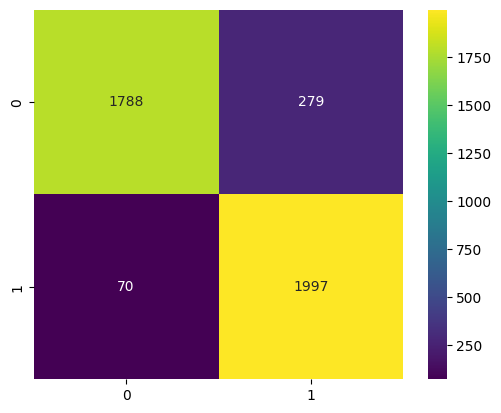

In [40]:
pred_probabilities = inception_resnet_model.predict(test_set)
predictions = pred_probabilities > 0.5

print(classification_report(test_set.classes,predictions))


from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(df_test['cell_type'].map({'parasitized': 0, 'uninfected': 1}),predictions)
f = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', square=True)

In [41]:
inception_resnet_model_accuracy = losses['val_accuracy'].iloc[-1].round(2) * 100
inception_resnet_model_accuracy

92.0

In [42]:
inception_resnet_model.save('inception_resnet_malaria.h5')

COMPARE

In [43]:
data = [vgg_model_accuracy, inception_resnet_model_accuracy]
index = ['VGG-19',  'ResNet Inception']
pd.DataFrame(data=data, index=index, columns=['Model Accuracy']).sort_values('Model Accuracy', ascending=False)

Model Accuracy
ResNet Inception            92.0
VGG-19                      87.0

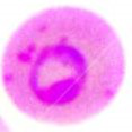

In [44]:
from keras.utils import load_img, img_to_array


cell = './first_test.jpg'
image1 = load_img(cell, target_size = image_shape)
image1


In [45]:
print(type(image1))

<class 'PIL.Image.Image'>


In [46]:
image1 = img_to_array(image1)

image1 = np.expand_dims(image1, axis=0)

image1.shape

(1, 132, 132, 3)

In [47]:
training_set.class_indices

{'parasitized': 0, 'uninfected': 1}

In [48]:
vgg_model.predict(image1)


1/1 [==============================] - 1s 672ms/step


array([[0.]], dtype=float32)

In [49]:
inception_resnet_model(image1)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.]], dtype=float32)>

model visualization

In [50]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 26.1 MB/s eta 0:00:00


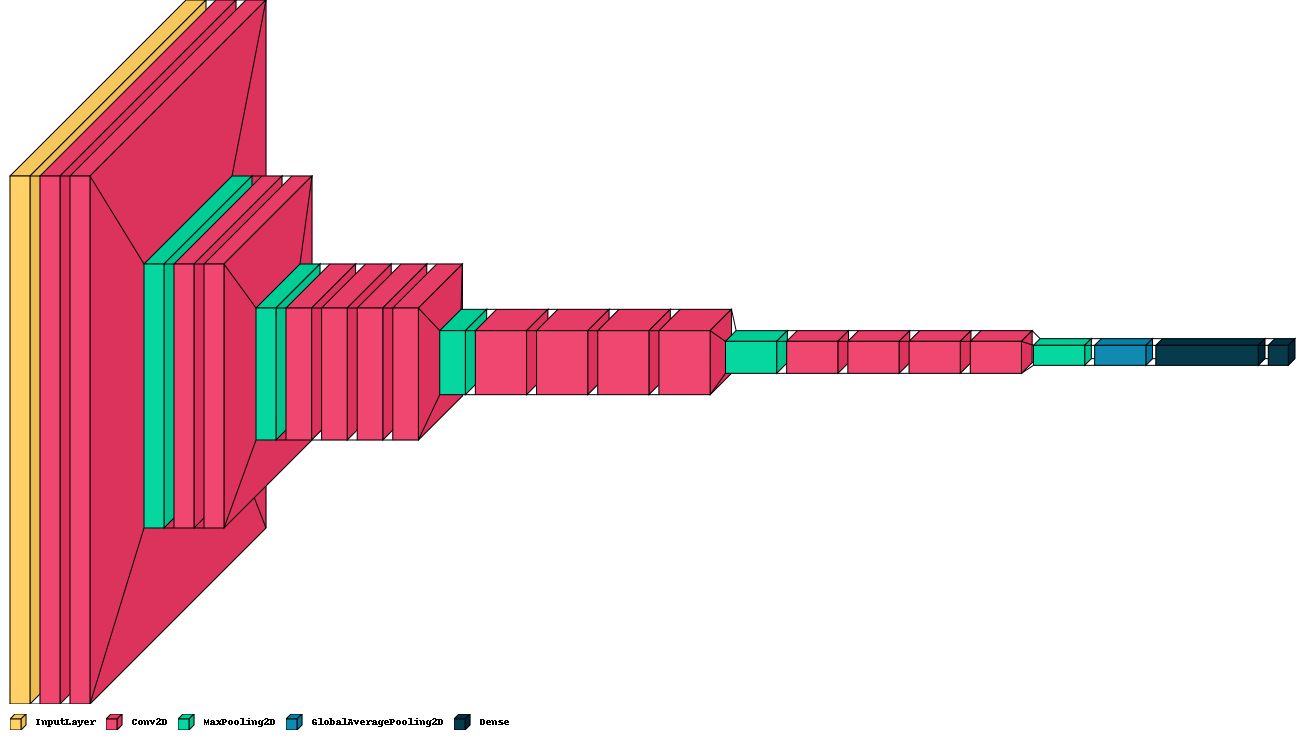

In [51]:
import visualkeras
from tensorflow.keras.models import load_model

model1 = load_model('./vgg_malaria.h5')
visualkeras.layered_view(model1, legend=True)

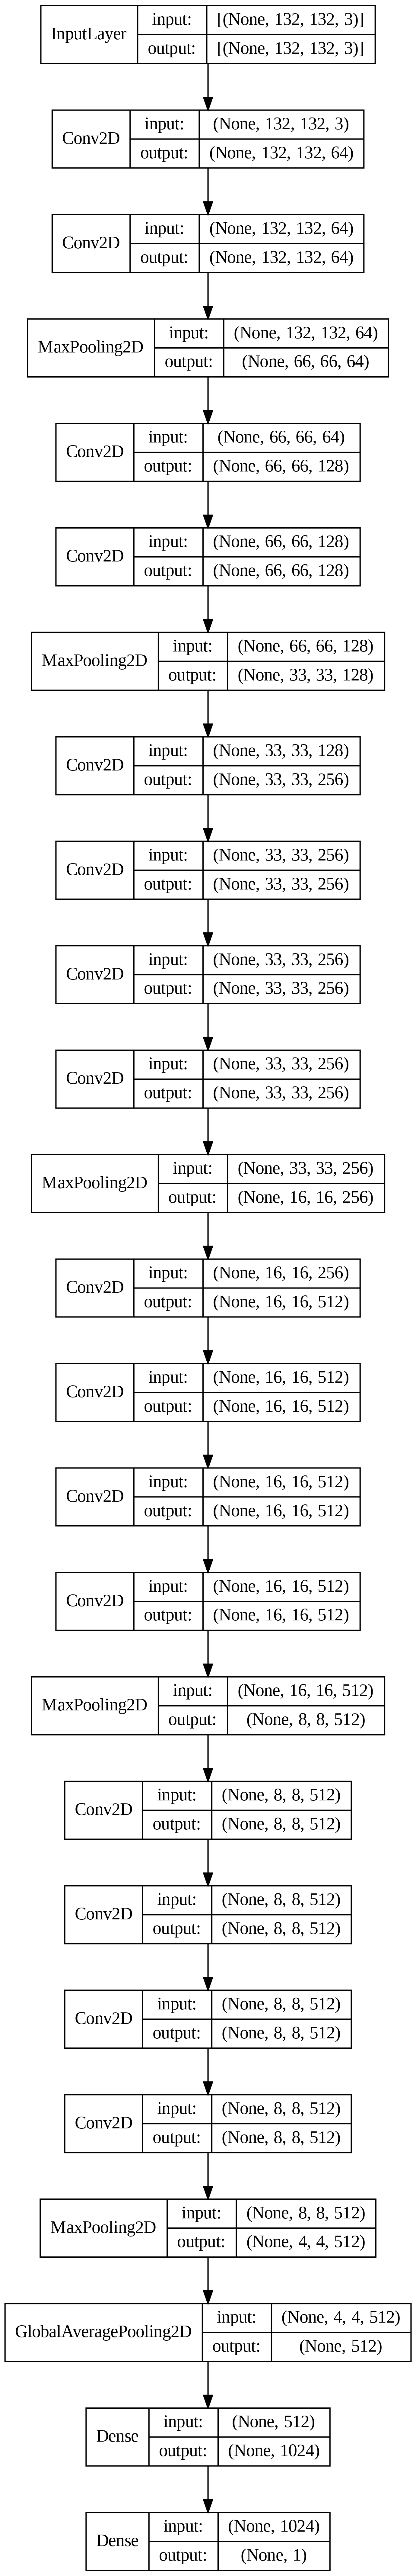

In [52]:
from tensorflow.keras.utils import plot_model

# Plotting the model and saving it to a file
plot_model(model1, to_file="model1.png", show_shapes=True,
           show_layer_names=False, dpi=300)

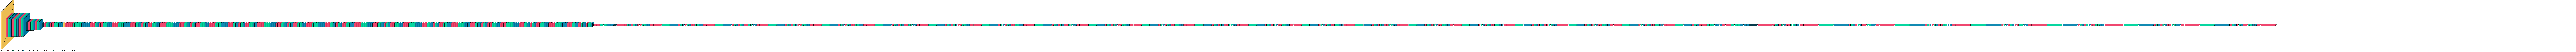

In [53]:
model2 = load_model('./inception_resnet_malaria.h5')
visualkeras.layered_view(model2, legend=True)

In [54]:
from tensorflow.keras.utils import plot_model

# Plotting the model and saving it to a file
plot_model(model2, to_file="model2.png", show_shapes=True,
           show_layer_names=False, dpi=300)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.165451 to fit

